In [5]:
#importing the important libraries 
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,classification_report,precision_score,recall_score,f1_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve, roc_auc_score

In [6]:
#loading the dataset
dataset = pd.read_csv("creditcard.csv")

In [7]:
#displaying first 10 rows of dataset
dataset.head(10)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
5,2.0,-0.425966,0.960523,1.141109,-0.168252,0.420987,-0.029728,0.476201,0.260314,-0.568671,...,-0.208254,-0.559825,-0.026398,-0.371427,-0.232794,0.105915,0.253844,0.081080,3.67,0
6,4.0,1.229658,0.141004,0.045371,1.202613,0.191881,0.272708,-0.005159,0.081213,0.464960,...,-0.167716,-0.270710,-0.154104,-0.780055,0.750137,-0.257237,0.034507,0.005168,4.99,0
7,7.0,-0.644269,1.417964,1.074380,-0.492199,0.948934,0.428118,1.120631,-3.807864,0.615375,...,1.943465,-1.015455,0.057504,-0.649709,-0.415267,-0.051634,-1.206921,-1.085339,40.80,0
8,7.0,-0.894286,0.286157,-0.113192,-0.271526,2.669599,3.721818,0.370145,0.851084,-0.392048,...,-0.073425,-0.268092,-0.204233,1.011592,0.373205,-0.384157,0.011747,0.142404,93.20,0
9,9.0,-0.338262,1.119593,1.044367,-0.222187,0.499361,-0.246761,0.651583,0.069539,-0.736727,...,-0.246914,-0.633753,-0.120794,-0.385050,-0.069733,0.094199,0.246219,0.083076,3.68,0


In [8]:
#displaying last 10 rows of dataset 
dataset.tail(10)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
284797,172782.0,-0.241923,0.712247,0.399806,-0.463406,0.244531,-1.343668,0.929369,-0.206210,0.106234,...,-0.228876,-0.514376,0.279598,0.371441,-0.559238,0.113144,0.131507,0.081265,5.49,0
284798,172782.0,0.219529,0.881246,-0.635891,0.960928,-0.152971,-1.014307,0.427126,0.121340,-0.285670,...,0.099936,0.337120,0.251791,0.057688,-1.508368,0.144023,0.181205,0.215243,24.05,0
284799,172783.0,-1.775135,-0.004235,1.189786,0.331096,1.196063,5.519980,-1.518185,2.080825,1.159498,...,0.103302,0.654850,-0.348929,0.745323,0.704545,-0.127579,0.454379,0.130308,79.99,0
284800,172784.0,2.039560,-0.175233,-1.196825,0.234580,-0.008713,-0.726571,0.017050,-0.118228,0.435402,...,-0.268048,-0.717211,0.297930,-0.359769,-0.315610,0.201114,-0.080826,-0.075071,2.68,0
284801,172785.0,0.120316,0.931005,-0.546012,-0.745097,1.130314,-0.235973,0.812722,0.115093,-0.204064,...,-0.314205,-0.808520,0.050343,0.102800,-0.435870,0.124079,0.217940,0.068803,2.69,0
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0
284806,172792.0,-0.533413,-0.189733,0.703337,-0.506271,-0.012546,-0.649617,1.577006,-0.414650,0.486180,...,0.261057,0.643078,0.376777,0.008797,-0.473649,-0.818267,-0.002415,0.013649,217.00,0


In [9]:
#displaying number of rows and columns in dataset
print(dataset.shape)

(284807, 31)


In [10]:
#displaying statistics about dataset
print(dataset.describe())

                Time            V1            V2            V3            V4  \
count  284807.000000  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05   
mean    94813.859575  3.919560e-15  5.688174e-16 -8.769071e-15  2.782312e-15   
std     47488.145955  1.958696e+00  1.651309e+00  1.516255e+00  1.415869e+00   
min         0.000000 -5.640751e+01 -7.271573e+01 -4.832559e+01 -5.683171e+00   
25%     54201.500000 -9.203734e-01 -5.985499e-01 -8.903648e-01 -8.486401e-01   
50%     84692.000000  1.810880e-02  6.548556e-02  1.798463e-01 -1.984653e-02   
75%    139320.500000  1.315642e+00  8.037239e-01  1.027196e+00  7.433413e-01   
max    172792.000000  2.454930e+00  2.205773e+01  9.382558e+00  1.687534e+01   

                 V5            V6            V7            V8            V9  \
count  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05   
mean  -1.552563e-15  2.010663e-15 -1.694249e-15 -1.927028e-16 -3.137024e-15   
std    1.380247e+00  1.332271e+00  1.23709

In [11]:
#displaying concise summary of dataset
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [12]:
#displaying distribution of Class column
dataset['Class'].value_counts()

0    284315
1       492
Name: Class, dtype: int64

Text(0, 0.5, 'Occurence')

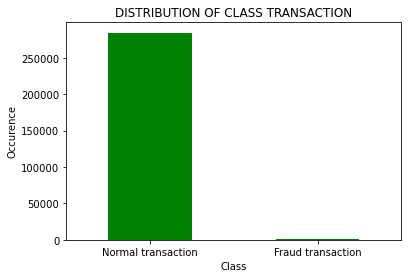

In [13]:
#visualising distribution of normal transactions and fraud transactions
class_count = pd.value_counts(dataset['Class'],sort = True)
class_count.plot(kind = 'bar',rot = 0,color = "green")
plt.title("DISTRIBUTION OF CLASS TRANSACTION")
lables = ["Normal transaction","Fraud transaction"]
plt.xticks(range(2), lables)
plt.xlabel("Class")
plt.ylabel("Occurence")

In [14]:
#obtaining percentage of normal and fraud transactions
normal = dataset[dataset.Class == 0]
fraud = dataset[dataset.Class == 1]
normal_precentage = round(len(normal)/dataset["Class"].count()*100,2)
print("PRECENTAGE OF NORMAL TRANSACTIONS IS ",normal_precentage)
fraud_precentage = round(len(fraud)/dataset["Class"].count()*100, 2)
print("PRECENTAGE OF FRAUD TRANSACTIONS IS ",fraud_precentage)

PRECENTAGE OF NORMAL TRANSACTIONS IS  99.83
PRECENTAGE OF FRAUD TRANSACTIONS IS  0.17


In [15]:
#displaying statistical information with respect to normal transactions 
normal.Amount.describe()

count    284315.000000
mean         88.291022
std         250.105092
min           0.000000
25%           5.650000
50%          22.000000
75%          77.050000
max       25691.160000
Name: Amount, dtype: float64

In [16]:
#displaying statistical information with respect to normal transactions 
fraud.Amount.describe()

count     492.000000
mean      122.211321
std       256.683288
min         0.000000
25%         1.000000
50%         9.250000
75%       105.890000
max      2125.870000
Name: Amount, dtype: float64

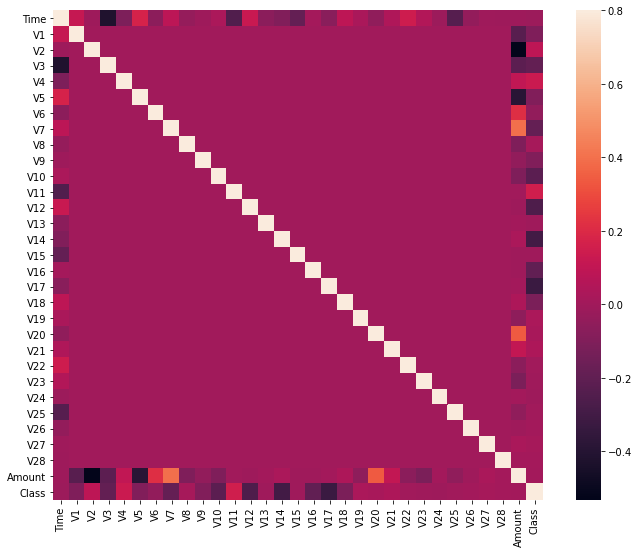

In [17]:
#displaying correlation in dataset 
correlation = dataset.corr()
fig = plt.figure(figsize = (12, 9))
sns.heatmap(correlation, vmax = .8, square = True)
plt.show()

In [18]:
#defining independant and dependant variables 
x = dataset.drop('Class', axis = 1).values
y = dataset['Class'].values

In [19]:
#splitting dataset into training set and testing set 
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, random_state = 0)

In [20]:
#handling class imbalance issue by standardizing dataset
std = StandardScaler()
x_train = std.fit_transform(x_train)
x_test = std.transform(x_test)

In [33]:
#appling random forest classifier algorithm 
random = RandomForestClassifier()
random.fit(x_train, y_train)
y_predicted = random.predict(x_test)

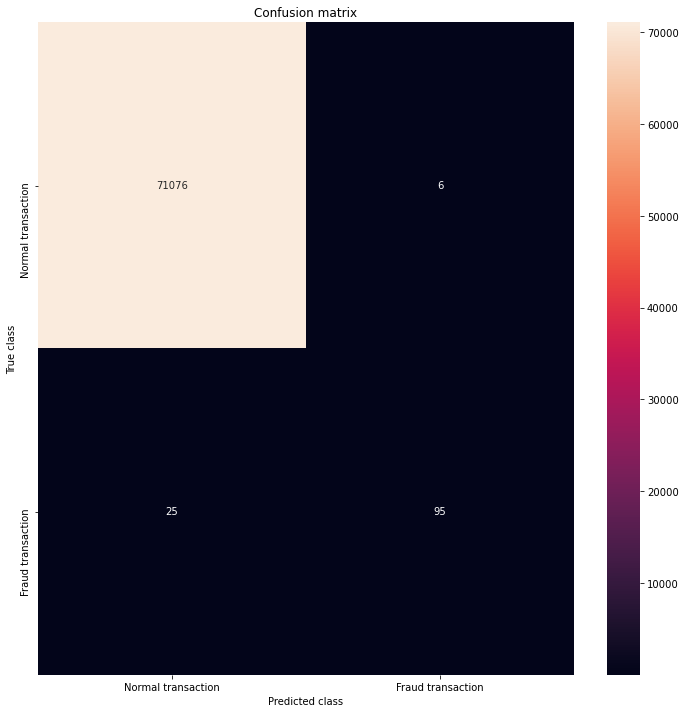

In [34]:
#showcasing confusion matrix for evaluating model 
cfm = confusion_matrix(y_test,y_predicted)
plt.figure(figsize =(12, 12))
sns.heatmap(cfm, xticklabels = lables, 
            yticklabels = lables, annot = True, fmt ="d");
plt.title("Confusion matrix")
plt.ylabel('True class')
plt.xlabel('Predicted class')
plt.show()

In [35]:
#finding accuracy of model
accuracy = accuracy_score(y_test, y_predicted)
print("ACCURACY = {}".format(accuracy))

ACCURACY = 0.9995646189713772


In [36]:
#finding f1 score of model
f1_measure = f1_score(y_test, y_predicted)
print("F1-SCORE = {}".format(f1_measure))

F1-SCORE = 0.8597285067873304


In [37]:
#finding precision of model 
precision = precision_score(y_test, y_predicted)
print("PRECISION = {}".format(precision))

PRECISION = 0.9405940594059405


In [38]:
#finding recall of model 
recall = recall_score(y_test, y_predicted)
print("RECALL = {}".format(recall))

RECALL = 0.7916666666666666


In [39]:
#obtaining area under the curve (AUC)  
random_prediction_test_prob = random.predict_proba(x_test)[:, 1]

In [28]:
fp,tp,threshold = roc_curve(y_test,random_prediction_test_prob)

In [29]:
random_auc = roc_auc_score(y_test,random_prediction_test_prob)

In [30]:
print("AREA UNDER THE CURVE ",random_auc)

AREA UNDER THE CURVE  0.940130705851458


In [31]:
#plotting ROC curve 
def plot_roc_curve(fp,tp, label=None):
    plt.figure(figsize=(8, 6))
    plt.title('ROC CURVE', fontsize=25)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.plot(fp, tp, linewidth=2, label=label,color="green")
    plt.xticks(np.arange(0, 1, 0.05), rotation=90)
    plt.xlabel('FALSE POSITIVE RATE', fontsize=18)
    plt.ylabel('TRUE POSITIVE RATE', fontsize=18)
    plt.legend(loc='best')
    
    plt.show()

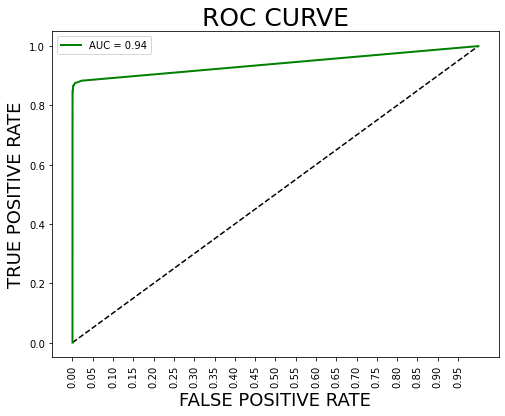

In [32]:
plot_roc_curve(fp=fp, tp=tp, label="AUC = %.2f" % random_auc)